## EDA

Para uma análise exploratória dos dados, é interessante cobrir alguns pontos importantes dos dados para um melhor entendimento e como trabalha-los posteriormente.

- Primeiramente, é importante verificar quanto sua qualidade, como dados duplicados ou valores faltantes.
- Também é útil avaliar os tipos de dados presentes no nosso dataset, como dados numéricos, categóricos etc.

Após essa verificação inicial e tratamento (se necessário), pode-se dar início a retiradas de metidas descritivas dos dados.

- Para verificar o comportamento de cada feature, podemos analisar suas distribuições, sua variação em relação a outras features de interesse, retiradas de medidas de  centralidade e variabilidade, ou seja, tendências e dispersões, entre outras.

- Pode-se verificar também medidas de correlação, ou seja, o quanto a variação de uma feature impacta em outra. 

Medidas de correlação ou de distribuição são importantes o seu conhecimento devido a possível aplição de algoritmos de machine learning posteriormente, onde tais medidas impactam o uso de modelos baseados em árvores ou lineares.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,6)

In [4]:
df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")

### 1 - Informações básicas sobre o conjunto de dados.

Informações sobre os tipos de dados presente no dataset. Vemos que, não existe nenhum dado faltante, além de cinco variáveis numéricas e três variáveis categóricas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [7]:
df.tail()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure
6666,10000,M24859,M,299.0,308.7,1500,40.2,30,No Failure


In [8]:
df.duplicated().sum()

0

In [9]:
df['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [10]:
mapping = {
    "No Failure": 'NF', 
    'Power Failure': 'PWF',
    'Tool Wear Failure': 'TWF', 
    'Overstrain Failure': 'OSF', 
    'Random Failures': 'RNF', 
    'Heat Dissipation Failure': 'HDF'}

In [11]:
df['failure_type'] = df['failure_type'].map(mapping)

### 2 - Quantidades de cada classe.

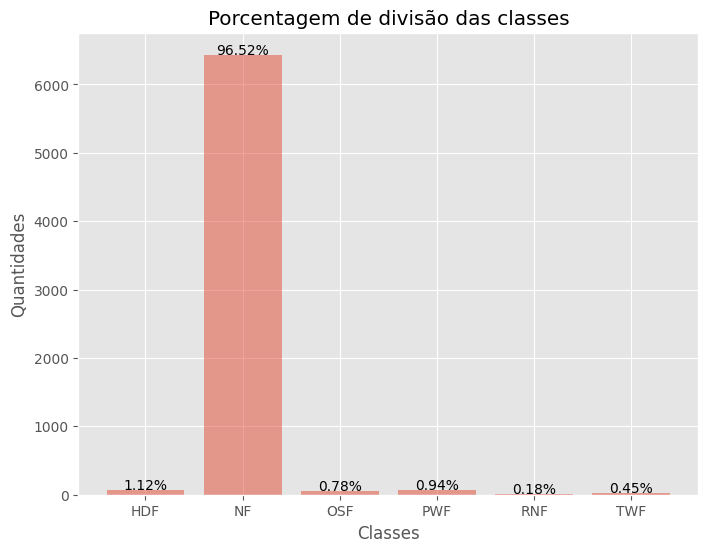

In [14]:
# Get the unique class labels and their counts
unique, counts = np.unique(df['failure_type'], return_counts=True)

# Plot the class distribution as a bar chart
graph = plt.bar(unique, counts, alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Quantidades')
plt.title("Porcentagem de divisão das classes")
for idx, rectangle in enumerate(graph):
    width = rectangle.get_width()
    height = rectangle.get_height()
    x, y = rectangle.get_xy()
    percentage = counts[idx] * 100 / np.sum(counts)
    plt.text(x + width/2, y+height+10, str(round(percentage, 2)) + "%", ha='center')

A partir do gráfico abaixo, notemos que ocorre um grande desbalanceamento na distribuição da nossa variável de interesse. O que pode ser um problema para o treinamento e avaliação de um modelo de aprendizagem, pois, baseado neste conjunto, se setarmos somente uma condição para sempre retornar "No Failure", obteríamos $96.52$% de acurácia.

### 3 - Medidas de centralidade e distribuição.

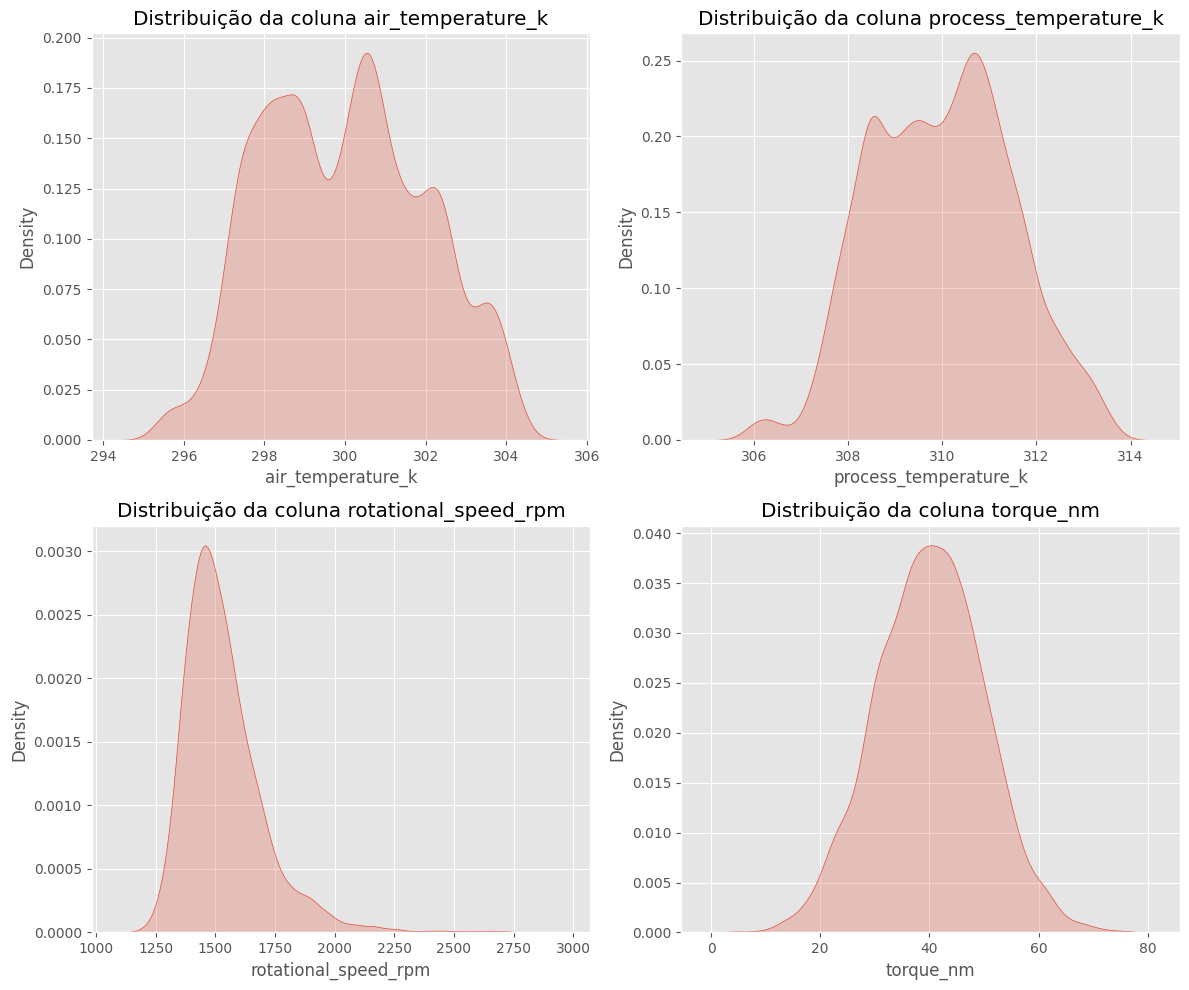

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=False, sharey=False)
axes = axes.ravel()
cols = df.columns[3:7]
for col, ax in zip(cols, axes):
    data = df[col]
    sns.kdeplot(data=data, fill=True, ax=ax)
    ax.set(title=f"Distribuição da coluna {col}")
    ax.legend([],[], frameon=False)

fig.tight_layout()
plt.show()

In [17]:
df[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm']].agg(['mean', 'std'])

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm
mean,299.992515,309.992620,1537.419529,40.058512
std,1.994710,1.488101,177.182908,9.950804


Unindo os valores de média e desvio padrão, vemos como os dados estão bem centrados em suas médias, com exceção da variável de `rotational_speed_rpm`com um alto valor de desvio padrão.

Visualmente, os gáficos acima aparentam se aproximar de uma distribuição normal. Podemos testar essa hipótese através do teste de normalidade de Shapiro-Wilk, tendo como H0 nossa hipótese nula, ou seja, nossa hipótese de interesse de que os dados segue uma distribuição normal.




In [19]:
from scipy.stats import shapiro
for col in cols:    
    stat, p = shapiro(df[col])
    if p <= 0.05:
        print(f"A variável {col} não segue uma distribuição normal")
    else:
        print(f"A variável {col} segue uma distribuição normal")


A variável air_temperature_k não segue uma distribuição normal
A variável process_temperature_k não segue uma distribuição normal
A variável rotational_speed_rpm não segue uma distribuição normal
A variável torque_nm segue uma distribuição normal


Através dos gráficos acima, podemos notar que as variáveis `air_temperature_k`, `process_temperature_k` aparentam uma distribuição normal, porém rejeitada pelo teste de sahipro-wilk, ao passo que, `rotational_speed_rpm` e `torque_nm`, possuem uma distribuição normal, como mostrado abaixo. Entender a distribuição das variáveis pode ser útil para aplicarmos  técnicas estátisticas, como inferências, testes, ou até mesmo escolher com mais propriedade qual modelo de aprendizagem utilizar.

Para compreender mais medidas estatísticas dos nosss dados, pode utilizar o boxplot, útil para obter informações sobre quartis, média, mediana e outliers.

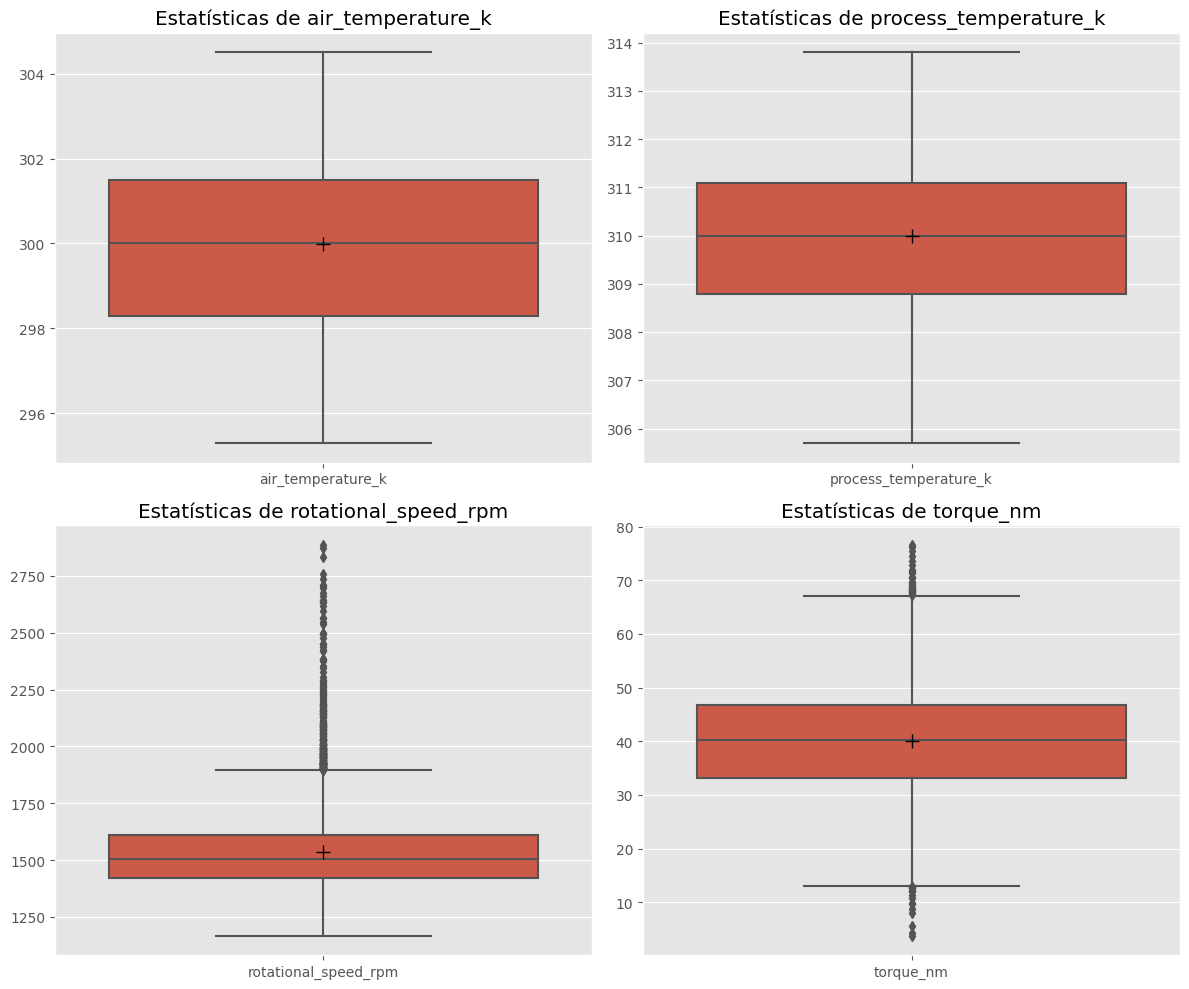

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=False, sharey=False)
axes = axes.ravel()
for col, ax in zip(cols, axes):
    data = df[[col]]
    sns.boxplot(data=data, ax=ax, showmeans=True, meanprops={"marker": "+",
                                            "markeredgecolor": "black",
                                            "markersize": "10"})
    ax.set(title=f"Estatísticas de {col}")
    ax.legend([],[], frameon=False)

fig.tight_layout()
plt.show()

A partir dos gráficos acima, vemos como as variáveis `air_temperature_k` e `process_temperature_k` estão bem centradas no intervalo interquartil (Q1 e Q3), ou seja, entre 25% à 75% dos valores dos dados. Já para `rotational_speed_rpm` e `torque_nm`, além de possuírem um intervalo interquartil menor (dada a distribuição normal observada acima), possuim alguns dados que podem ser tratados posteriormente como outliers.

- Medidas da variável `tool_wear_min`

Com os gráficos abaixo, podemos dizer, por aproximação que a variável descrita está uniformemente distribuida.

/tmp/ipykernel_38932/2429382802.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=df, x="tool_wear_min",shade=True)


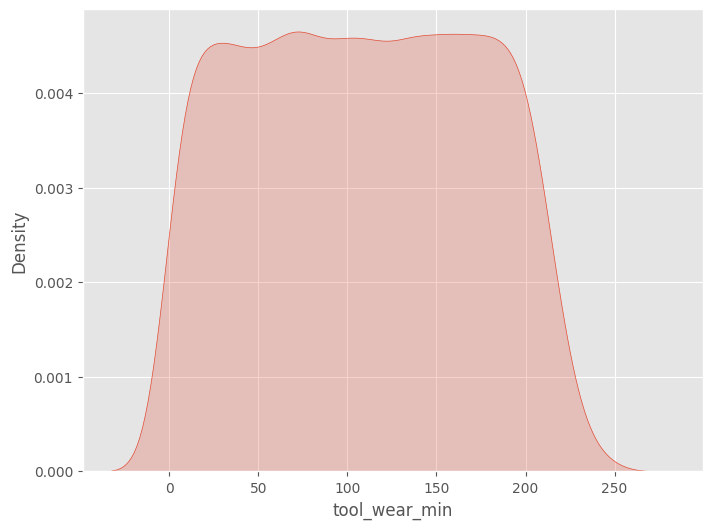

In [21]:
ax = sns.kdeplot(data=df, x="tool_wear_min", fill=True)
mean = np.mean(df['tool_wear_min'])
plt.show()

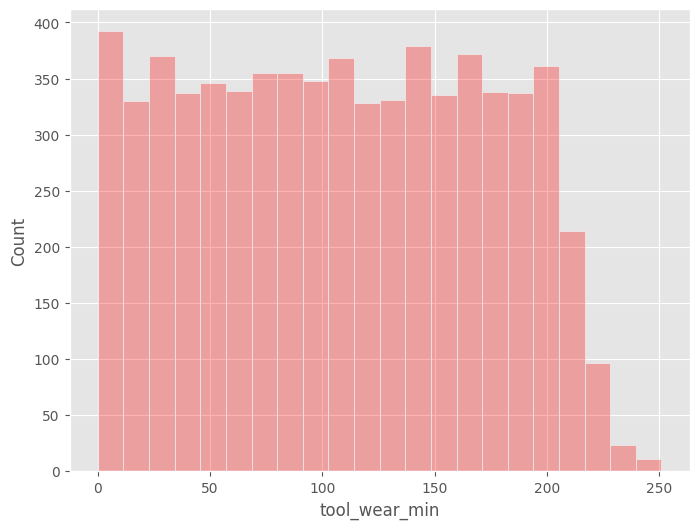

In [23]:
sns.histplot(data=df, x="tool_wear_min", alpha=0.3, color='red')
plt.show()

- Variável Categórica

Para nossa variável categórica, especificando o tipo de produto, podemos analisar, assim como nossa variável alvo, como seus valores são distribuídos.

Notamos como há uma grande diferença do tipo de produto "low", tendo o dobro de amostras em relação aos produtos "mediums", que por sua vez tem o triplo de valores em relação aos produtos "high".

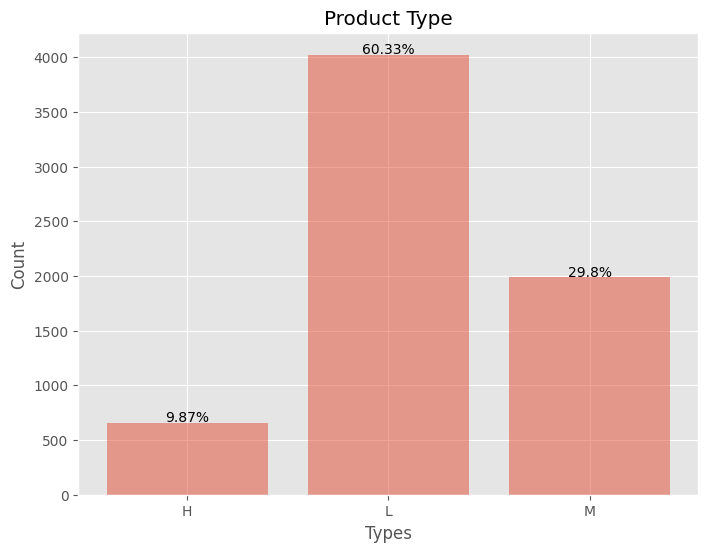

In [24]:
# Get the unique class labels and their counts
unique, counts = np.unique(df['type'], return_counts=True)

# Plot the class distribution as a bar chart
graph = plt.bar(unique, counts, alpha=0.5)
plt.xlabel('Types')
plt.ylabel('Count')
plt.title("Product Type")
for idx, rectangle in enumerate(graph):
    width = rectangle.get_width()
    height = rectangle.get_height()
    x, y = rectangle.get_xy()
    percentage = counts[idx] * 100 / np.sum(counts)
    plt.text(x + width/2, y+height+10, str(round(percentage, 2)) + "%", ha='center')

In [25]:
df.groupby(['type'])[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
type,,,,,
H,299.867781,309.918541,1543.603343,39.732219,106.528875
L,300.007534,310.002337,1536.758826,40.105843,108.692939
M,300.003422,309.997484,1536.709109,40.070760,107.413689


### 4 - Análise de correlações.

- Primeiramente, é útil notar, graficamente, como uma variável se comporta a medida de que os valores de outra se alteram. Para isso, podemos utilizar o paiplot.

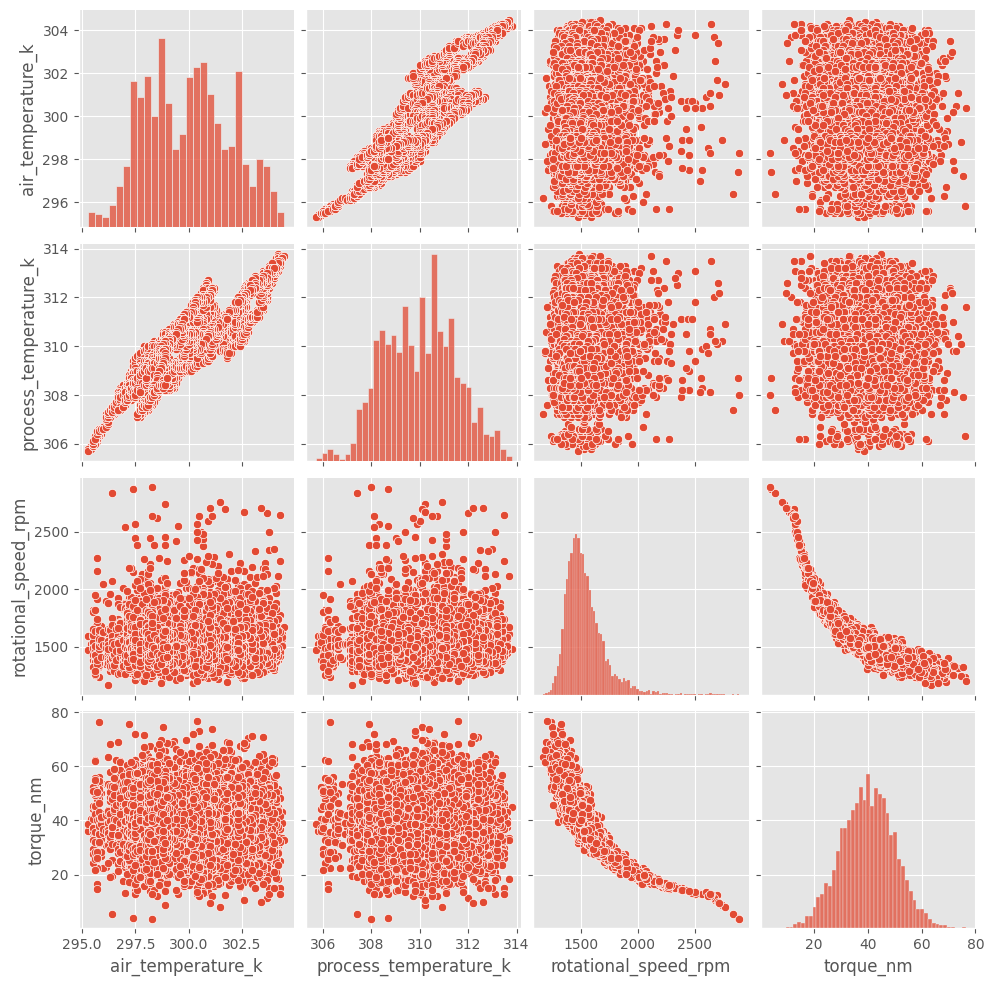

In [26]:
cols = list(df.columns[3:7])
sns.pairplot(df.loc[:, cols], diag_kind="hist")
plt.show()

- Dado o gráfico acima, podemos realizar algumas observações:

    - 1 As variáveis `air_temperature` e `process_temperature` possuem uma correlação positiva, ou seja, a medida que uma aumenta, a outra também segue o mesmo processo.

    - 2 As variáveis `rotational_speed_rpm` e `torque_nm` possuem uma correlação negativa, ou seja, a medida que uma aumenta, a outra diminui em seus valores. 

- Para realizar as medições dos valores de correlação, podemos utilizar o coeficiente de pearson, com valores entre [-1, 1], pois, as variáveis selecionadas são normalmente distribuídas.

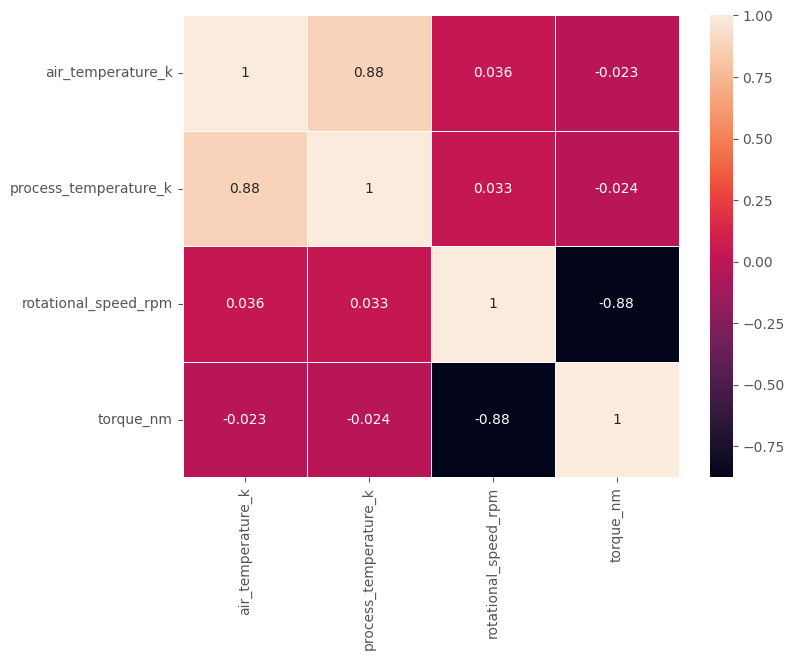

In [27]:
correlation = df.iloc[:, 3:7].corr()
sns.heatmap(correlation, annot=True, linewidth=.5)
plt.show()

Como observado no pairplot, as variáveis `air_temperature_k` e `process_temperature_k` possuem um alto coeficiente de correlação, sendo próximo a 1, e as variáveis `rotational_speed_rpm` e `torque_nm`, possuem o mesmo valor de coefiente, porém, negativo.

Para as outras variáveis, temos correlações fracas.